In [2]:
import pandas as pd
import random
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.cluster import DBSCAN
import math
import statistics
pd.options.mode.chained_assignment = None  # default='warn'

#Convert CSV to Dataframe
data = pd.read_csv("C:/Users/Siloux/Downloads/pairwise_user_experiment (7).csv", header=[0])
data["LAST MOD BY"] = data["LAST MOD BY"].apply(lambda x: x.split(" ")[0])
data

,IN FILE,CLIP LENGTH,OFFSET,DURATION,MAX FREQ,MIN FREQ,SAMPLE RATE,MANUAL ID,TIME_SPENT,LAST MOD BY,CONFIDENCE,RETIRED,COUNTED
0,XC23899_-_White-vented_Shama_-_Copsychus_niger...,61.1034,1.1839,1.3399,24000,0,48000,White-vented Shama,141.864,spres,0.577908,False,0
1,XC23899_-_White-vented_Shama_-_Copsychus_niger...,61.1034,6.9715,1.5479,24000,0,48000,White-vented Shama,141.864,spres,0.577908,False,0
2,XC23899_-_White-vented_Shama_-_Copsychus_niger...,61.1034,8.8594,0.4500,24000,0,48000,White-vented Shama,141.864,spres,0.577908,False,0
3,XC23899_-_White-vented_Shama_-_Copsychus_niger...,61.1034,9.9393,1.0800,24000,0,48000,White-vented Shama,141.864,spres,0.577908,False,0
4,XC23899_-_White-vented_Shama_-_Copsychus_niger...,61.1034,15.1890,0.9299,24000,0,48000,White-vented Shama,141.864,spres,0.577908,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243,XC688950_-_Balearic_Warbler_-_Sylvia_balearica...,25.9531,22.3916,0.8100,24000,0,48000,bird,311.194,Anshul,0.300511,False,0
2244,XC688950_-_Balearic_Warbler_-_Sylvia_balearica...,25.9531,23.7316,0.1600,24000,0,48000,bird,311.194,Anshul,0.300511,False,0
2245,XC688950_-_Balearic_Warbler_-_Sylvia_balearica...,25.9531,24.2615,0.1200,24000,0,48000,bird,311.194,Anshul,0.300511,False,0
2246,XC688950_-_Balearic_Warbler_-_Sylvia_balearica...,25.9531,24.7815,0.1600,24000,0,48000,bird,311.194,Anshul,0.300511,False,0


In [6]:
def labels_users_plot(file_, data):
    data_oi = data[data["IN FILE"] == file_]
    users = data_oi["LAST MOD BY"].unique()
    fig, ax = plt.subplots()
    colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(users))))
    i = 0
    for user in users:
        i += 1
        user_annotations = data_oi[data_oi["LAST MOD BY"] == user]
        x = user_annotations["OFFSET"]
        y = x + user_annotations["DURATION"]
        ax.plot(x, y, 'o', color=next(colors), label=str(i));
    ax.set_title(file_)
    ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    ax.set_xlabel("Start Time")
    ax.set_ylabel("End Time")


In [7]:
files = data["IN FILE"].unique()

C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


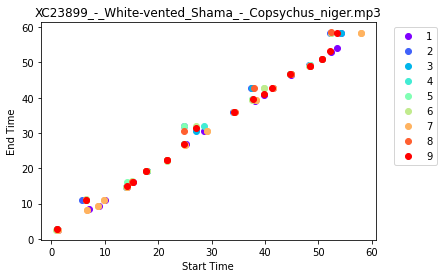

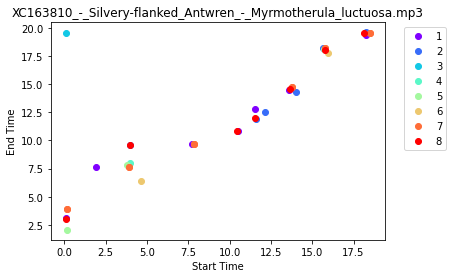

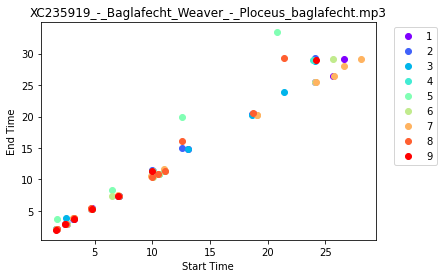

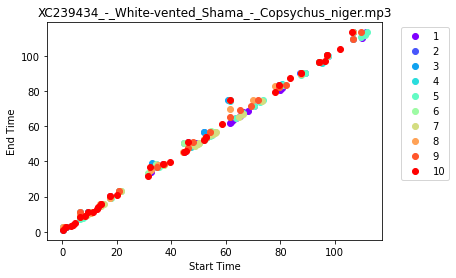

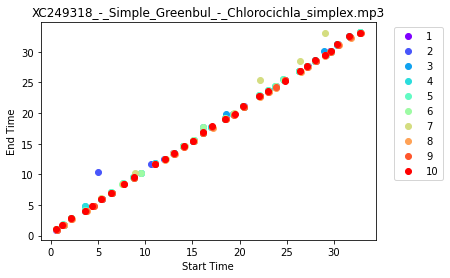

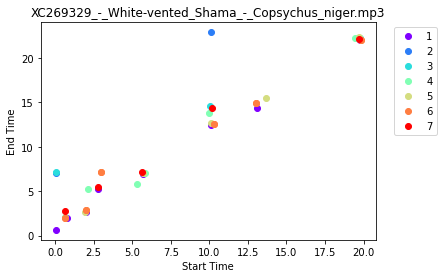

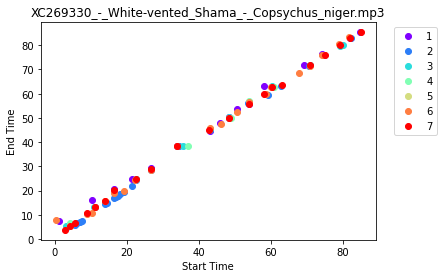

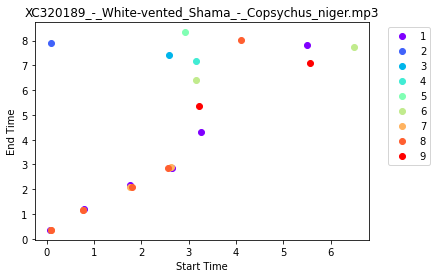

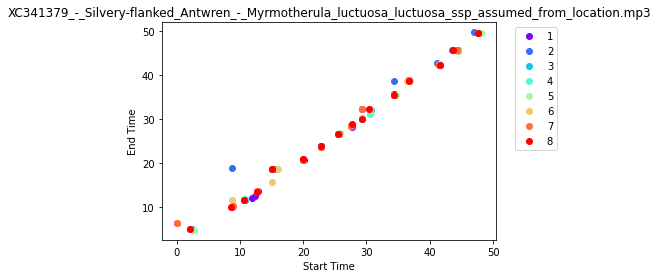

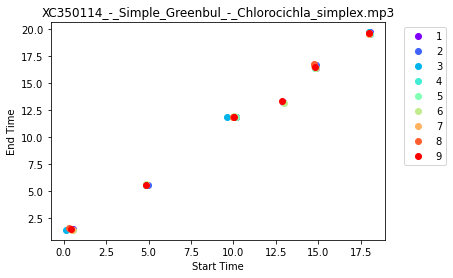

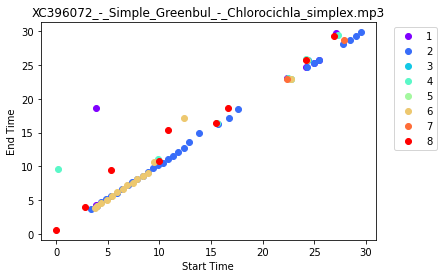

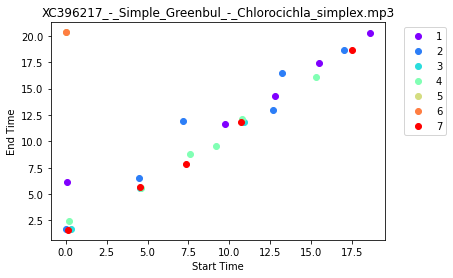

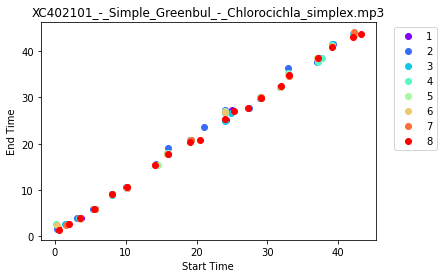

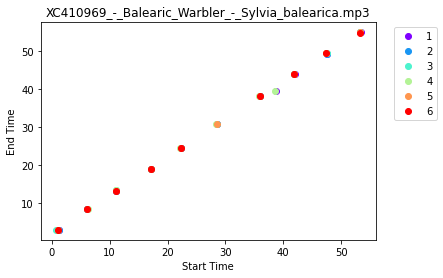

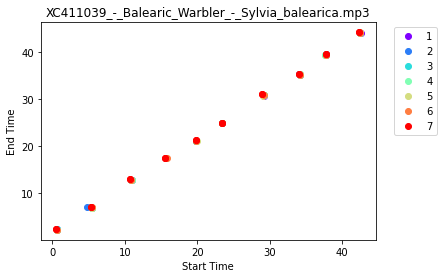

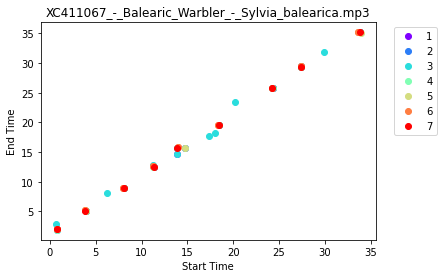

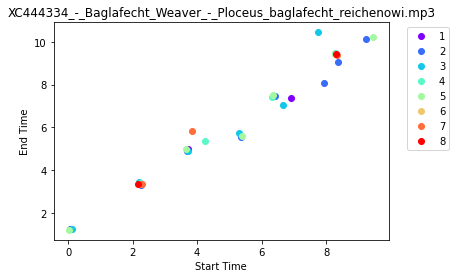

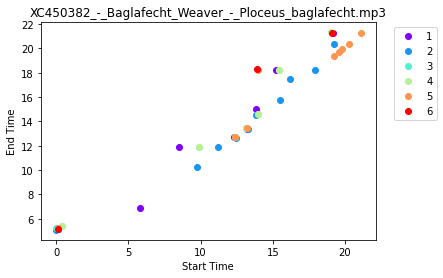

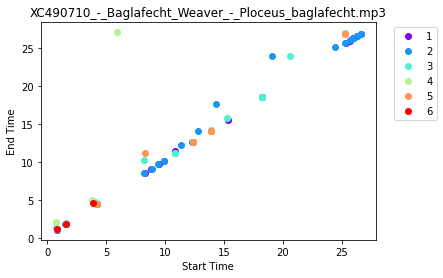

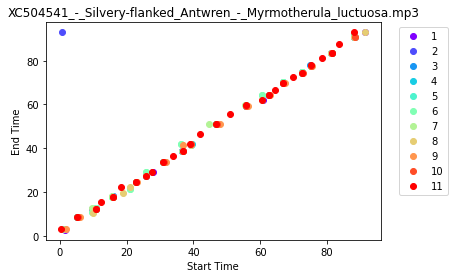

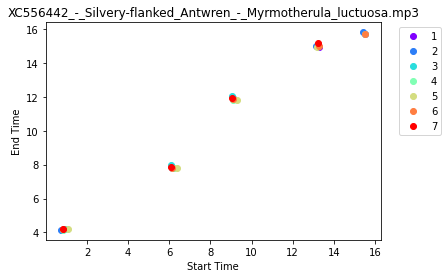

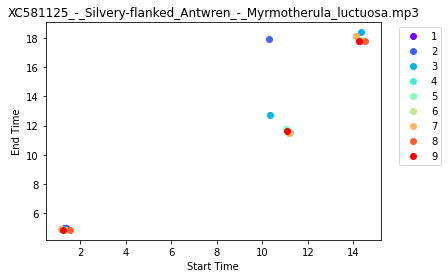

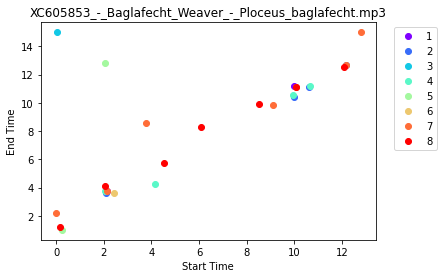

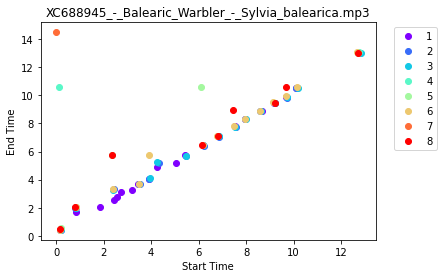

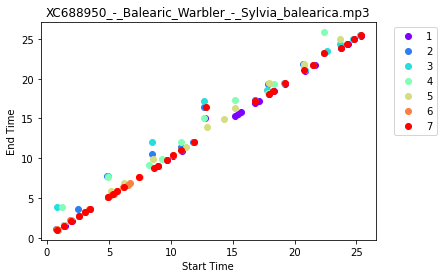

In [8]:
for file in files:
    labels_users_plot(file, data)

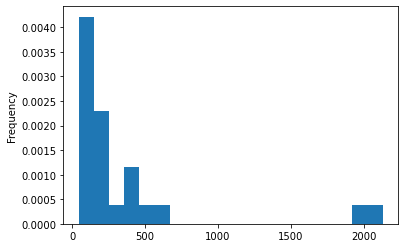

In [15]:
data.groupby("IN FILE").mean()["TIME_SPENT"].plot(kind="hist", density=True, bins=20);

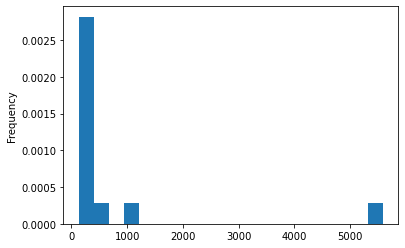

In [16]:
data.groupby("LAST MOD BY").mean()["TIME_SPENT"].plot(kind="hist", density=True, bins=20);

In [17]:
data

,IN FILE,CLIP LENGTH,OFFSET,DURATION,MAX FREQ,MIN FREQ,SAMPLE RATE,MANUAL ID,TIME_SPENT,LAST MOD BY,CONFIDENCE,RETIRED,COUNTED
0,XC23899_-_White-vented_Shama_-_Copsychus_niger...,61.1034,1.1839,1.3399,24000,0,48000,White-vented Shama,141.864,spres,0.577908,False,0
1,XC23899_-_White-vented_Shama_-_Copsychus_niger...,61.1034,6.9715,1.5479,24000,0,48000,White-vented Shama,141.864,spres,0.577908,False,0
2,XC23899_-_White-vented_Shama_-_Copsychus_niger...,61.1034,8.8594,0.4500,24000,0,48000,White-vented Shama,141.864,spres,0.577908,False,0
3,XC23899_-_White-vented_Shama_-_Copsychus_niger...,61.1034,9.9393,1.0800,24000,0,48000,White-vented Shama,141.864,spres,0.577908,False,0
4,XC23899_-_White-vented_Shama_-_Copsychus_niger...,61.1034,15.1890,0.9299,24000,0,48000,White-vented Shama,141.864,spres,0.577908,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243,XC688950_-_Balearic_Warbler_-_Sylvia_balearica...,25.9531,22.3916,0.8100,24000,0,48000,bird,311.194,Anshul,0.300511,False,0
2244,XC688950_-_Balearic_Warbler_-_Sylvia_balearica...,25.9531,23.7316,0.1600,24000,0,48000,bird,311.194,Anshul,0.300511,False,0
2245,XC688950_-_Balearic_Warbler_-_Sylvia_balearica...,25.9531,24.2615,0.1200,24000,0,48000,bird,311.194,Anshul,0.300511,False,0
2246,XC688950_-_Balearic_Warbler_-_Sylvia_balearica...,25.9531,24.7815,0.1600,24000,0,48000,bird,311.194,Anshul,0.300511,False,0
